#Speech Processing Lab - Week 5 Phase 2


Name: S U Swakath 

Roll number: 180020036

Google Colab Link : https://colab.research.google.com/drive/1hq_-xQemkehmXLXVnpiGW_ZxCX-UBcy9?usp=sharing

**Aim**
* To study different sound units present in majority of Indian languages.
* To understand the production mechanism of each sound unit.
* To learn the time domain and frequency domain characteristics of different sound units.

**Introduction**

Speech generated from the speech production system consists of a sequence of basic sound units of a particular language. The need for studying the basic alphabet set (orthographic representation) of any language is to be able to express message in written form. On the similar lines we need to study the basic sound units set ( acoustic representation) of any language for producing message in oral form. Every language is provided with unique set of alphabet set and sound units set. In most of the Indian languages we have about 40-50 distinct alphabets set and also of nearly same number of sound units set.

The process of learning to speak in a particular languages involves getting to know about the valid combination that have some meaning and then using them in proper order, resulting in what is called speech signal. Whether the remaining is formal and informal, over time we get hold into the basic sound units of a particular language and some words that enable us to produce speech in a particular language, with respect to time the vocabulary of words in that languages increases. Thus one of the important steps in speech processing is to get a feel about the different sounds used for speech production.

From signal processing point of view the different sounds have different time, frequency and time-frequency representations and hence make them perceptually distinct. These difference give a basis to classify the sound into different categories. Two such categories are vowels and stop consonants which will be discussed in this lab.

**Nasals**

Nasal sounds are similar to vowels having lower formant energy compared to vowels. Nasal sounds are produced with the help of air flow in nasal cavity.

**Semi-Vowels**

The semivowels are weakly periodic as compared to the vowels and having lower energy as compared to vowels. The set of semivowels in Indian language include /y/, /r/, /l/ and /v/. Among these, /y/ and /r/ are aspirated and /l/ and /v/ are unaspirated.

**Fricatives**

The fricatives are the consonants produced by a narrow constriction somewhere along the length of the vocal tract. The basic difference between fricatives and stop consonants is that the closure will be partial & narrow in case of fricatives & is complete in case of stop consonants. Depending on the place of narrow constrictions, we have different fricatives. In case of most Indian languages we have |s|, |sh|, |shh| & |h| as the fricatives. |s| is a dental fricative, |sh| is an alveolar fricative, |shh| is also an alveolar fricative but with more stress and |h| is a velar fricative.

**Affricates**

The affricates are the consonants where the production involves combination of stop and fricative consonant production. Initially, the vocal tract will be completely closed somewhere all the length to create a total constrictions. After this, the constriction will be partially released to create a fricative excitations. Most of the Indian languages have |ch|, |chh|, |j| & |jh| as the affricate consonants. All these affricates are produced at the palatal region. The difference across different affricates is due to different MOA.


#Problem C

Nasals

1. Record the sounds of any two nasal sounds and plot their time domain waveform, the magnitude spectrum and the spectrogram.
2. Inspect the above plots and write your observations. Also, comment on how they compare to vowel sounds.


**Procedure**
1.   Record the sounds /na/ and /m/ using wavesurfer, save the recoring in .wav format and upload it in drive and access it in colab. (While recording the vowel /a/ is said before and after the nasal sound.)
2. Plot the time domain plot, magnitude spectrum, and spectrofram for each of the audio.

In [1]:
# Mounting Google Drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
# Changing directory
%cd /content/gdrive/MyDrive/Sem6/Speech Lab/Week5_Phase2
!ls

/content/gdrive/MyDrive/Sem6/Speech Lab/Week5_Phase2
m.wav  na.wav  r.wav  sh.wav  s.wav  Week-5_Phase-2.ipynb  y.wav


In [17]:
# Importing Libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq,fftshift
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
import soundfile as sf
from matplotlib import cm
#Functions 
# Time domain plot
# Plotting time domain plot of the audio
def timePlot (sound,fs,name):
  plt.figure(figsize=(20,3))
  librosa.display.waveplot(audio, sr=fs);
  plt.title("Time Domain Plot of Speech Signal (Fs = " +str(fs)+" Hz)")
  plt.xlabel('Time (sec)')
  plt.ylabel('Amplitude')
  plt.show()

# Magnitude spectrum plot function
def magnitudeSpectrum(sound):
    
  # Computing the FFT of the sound
  sound_len = sound.shape[0]
  sound_fft = fft(sound)/sound_len

  # Computing the frequency array
  freqs = fftfreq(sound_len, 1/fs)
  
  freqs = freqs[0:sound_len//2]
  fft_db = 2*np.log10(np.abs(sound_fft[0:sound_len//2]))
  return freqs,fft_db

def plots (audio, name, fs,start,stop,frame_rate=8):
  window = audio[int (fs*start):int (fs*stop) ]
  f,f_db = magnitudeSpectrum(window)

  # Plotting time domain plot of the audio
  plt.figure(figsize=(30,6))
  plt.subplot(1,3,1)
  librosa.display.waveplot(audio, sr=fs);
  plt.title("Time Domain Plot of Speech Signal")
  plt.xlabel('Time (sec)')
  plt.ylabel('Amplitude')

  #magnitude spectrum
  plt.subplot(1,3,2)
  plt.plot(f,f_db)
  plt.title("Magnitude spectrum")
  plt.xlabel("Frequency (in Hz)")
  plt.ylabel("Amplitude (in dB)")
  
  # Spectrogram
  plt.subplot(1,3,3)
  plt.suptitle("Plot for sound " +name + " (Fs = " +str(fs)+" Hz)" )
  D = librosa.stft(audio, n_fft=512, win_length=128, hop_length=frame_rate)
  S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
  librosa.display.specshow(S_db, x_axis='s', y_axis='linear', sr=fs,hop_length=frame_rate, cmap=cm.gnuplot2)
  plt.title("Spectrogram")
  plt.colorbar()
  plt.show()


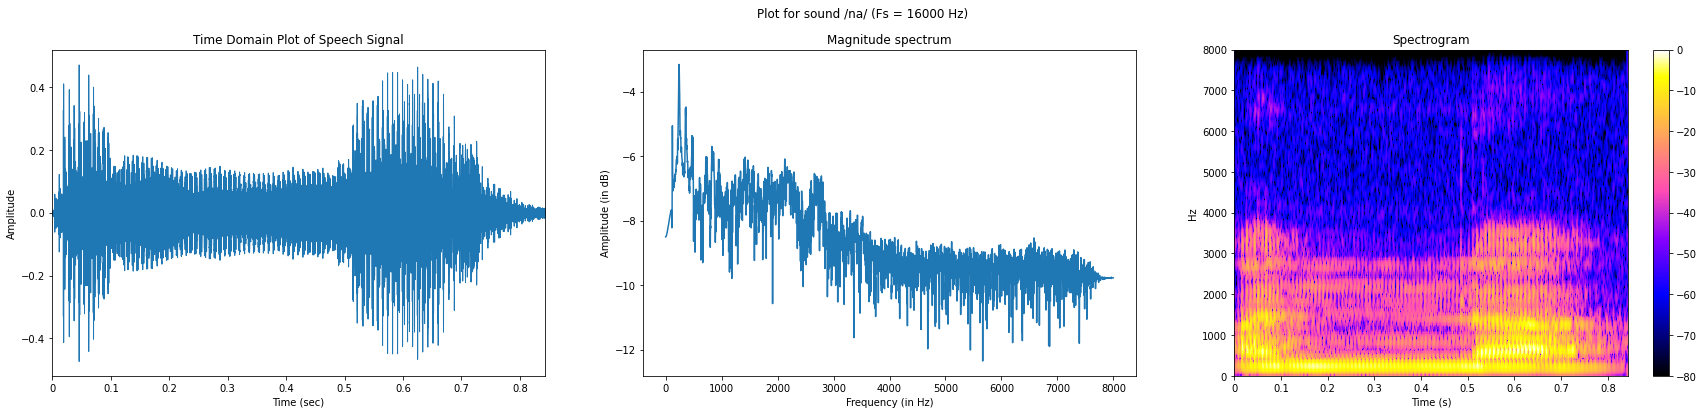

--- 



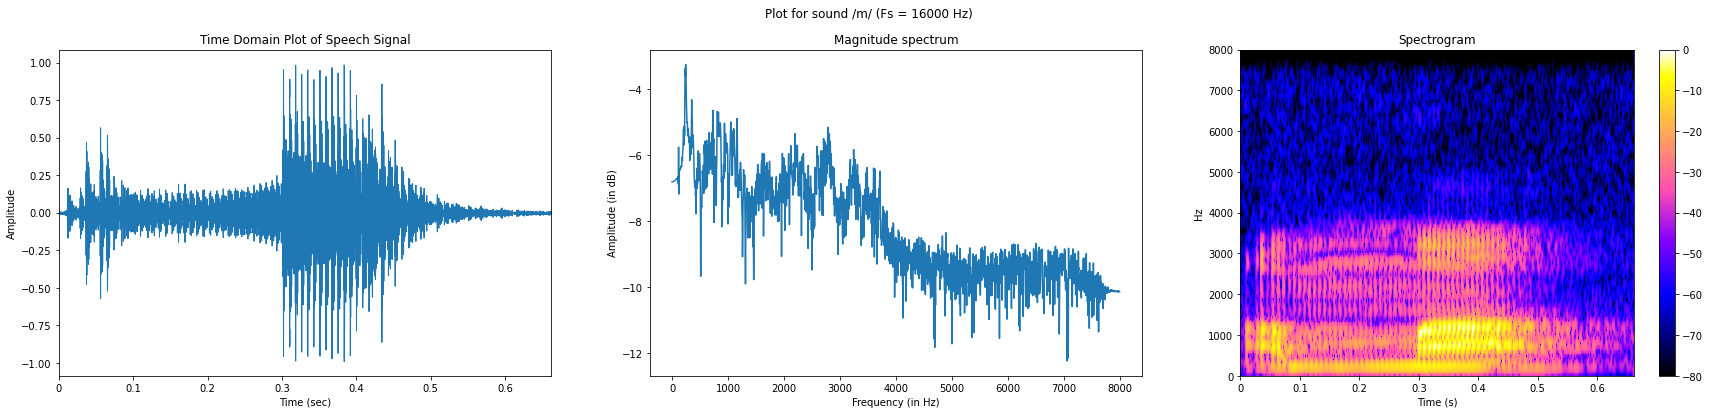

--- 



In [20]:
# Loading the audio into colab. Fs = 16kHz
na, fs = librosa.load("na.wav", sr = 16000)
m, fs = librosa.load("m.wav", sr = 16000)

nasal = [na,m]
nasalNames = ['/na/','/m/']
nasalStart = [0.111,0.09]
nasalStop = [0.502,0.295]
i = 0
for curNas in nasal:
  plots(curNas,nasalNames[i],fs,nasalStart[i],nasalStop[i])
  print("--- \n")
  i = i+1

**Observations**

* /na/ and /m/ as voiced nasal sounds. We can clearly see the periodic nature of the sound in the spectrogram and the magnitude spectrum.


* Nasal sounds have less power when compaired to vowels. This can be observed in the time domain plot. The amplitude of the nasal sound is lower than that of the vowel /a/.

* The significant frequency components present around 1000 Hz in the vowel /a/ is missing in case of the nasal sounds. This is due to the anti-resonance that occurs druing the production of the nasal sounds. This antiresonance phenomina can be clearly seen in the spectrogram of the nasal sounds.


#Problem D

Semi-Vowels

1. Record the sounds of any two semi-vowels and plot their time domain waveform, the magnitude spectrum and the spectrogram.
2. Inspect the above plots and write your observations. Comment on how these vary from the vowel sounds.


**Procedure**
1. Record the sound /y/ and /r/ using wavesurfer and upload it in to google drive and access it in colab. (While recording the vowel /a/ is said after the nasal sound.)
2. Plot the time domain plot, magnitude spectrum and spectogram of each sound.

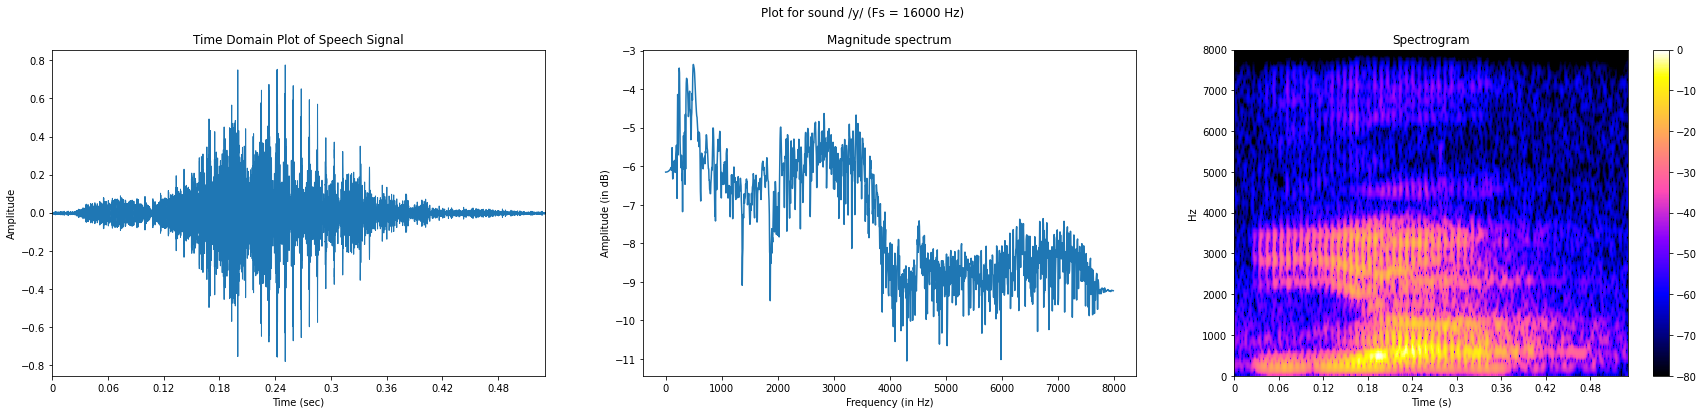

--- 



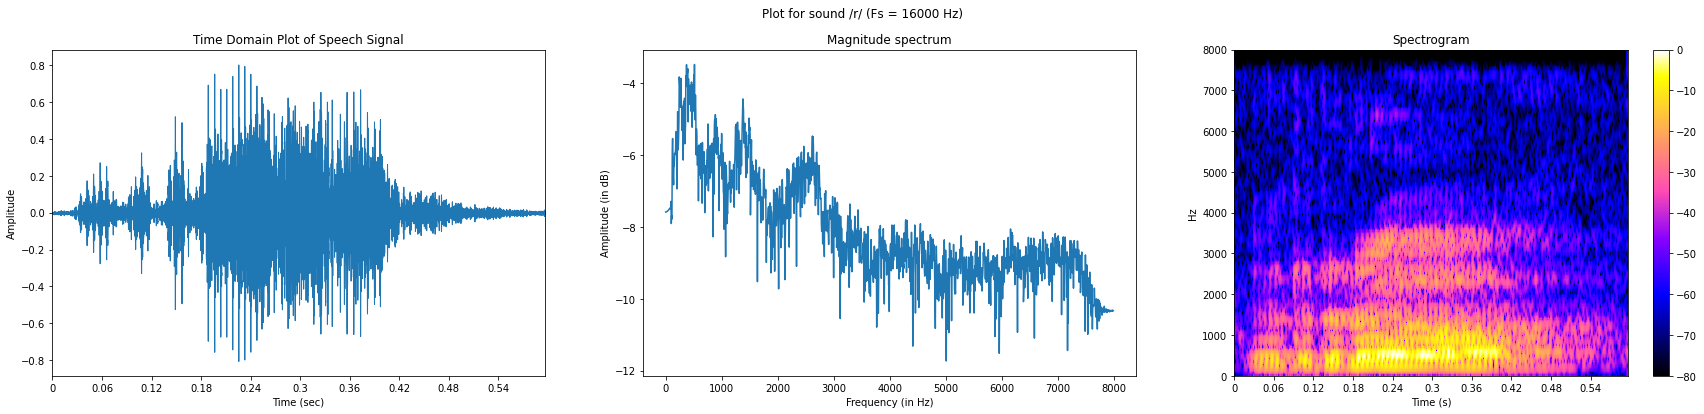

--- 



In [19]:
y, fs = librosa.load("y.wav", sr = 16000)
r, fs = librosa.load("r.wav", sr = 16000)

semiVowel = [y,r]
semiVowelNames = ['/y/','/r/']
semiStart= [0.018,0.015]
semiStop= [0.200,0.184]
i = 0
for cursemiVow in semiVowel:
  plots(cursemiVow,semiVowelNames[i],fs,semiStart[i],semiStop[i])
  print("--- \n")
  i = i+1

**Observation**

1. /y/ and /r/ are aspirated semi-vowels. 
2. The formant frequency in /y/ have lower enegry when compaired to vowel /a/. Which is a property of semi-vowel
3. /r/ has periodic burst and closure and frications.


#Problem E

Fricatives

1. Pick up any two fricatives having different positions of constrictions. Record these sounds and plot the time-domain waveform, the magnitude spectrum and the spectrogram.
2. Inspect the above plots and write your observations.

Procedure

1. Record the word the Fricative sound /sh/ and /s/ using wavesurfer, save the recoring in .wav format and upload it in drive and access it in colab. (While recording the vowel /a/ is said after the nasal sound.)

2. Plot the time domain plot, magnitude spectrum, and spectrogram for each of the audio.

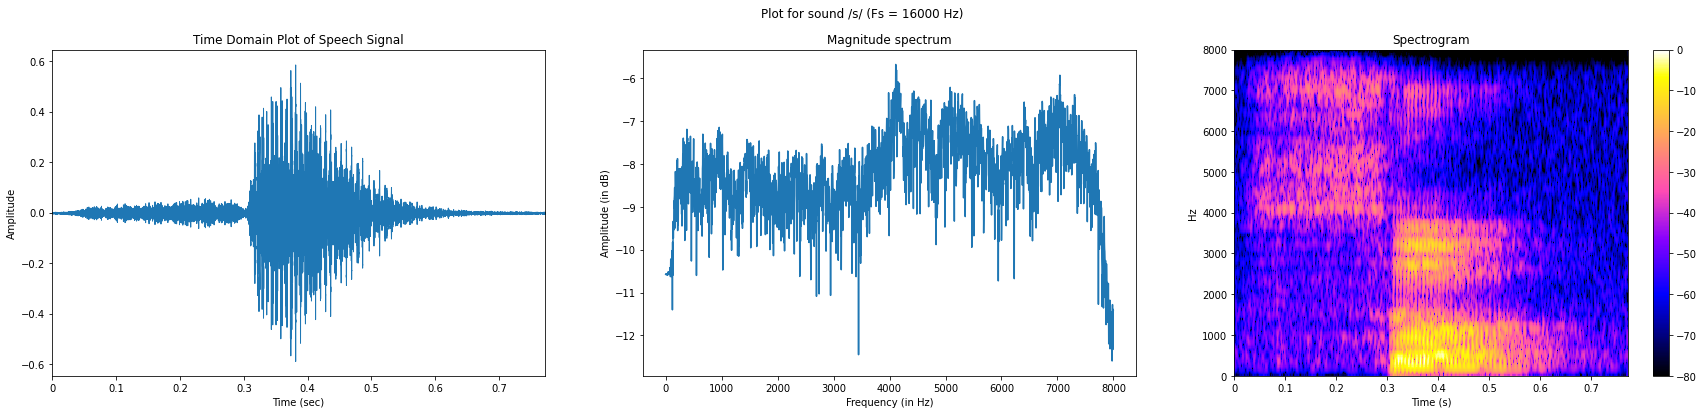

--- 



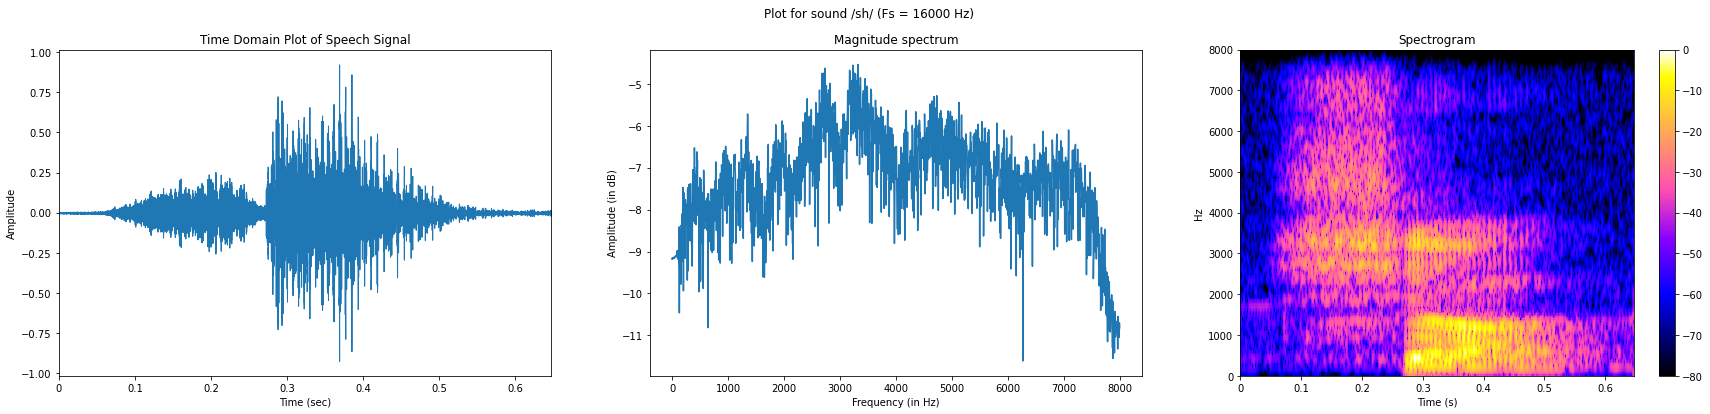

--- 



In [18]:
s, fs = librosa.load("s.wav", sr = 16000)
sh, fs = librosa.load("sh.wav", sr = 16000)

fricatives = [s,sh]
fricStart = [0.003,0.009]
fricStop = [0.301,0.269]
fricativeNames = ['/s/','/sh/']

i = 0
for curFri in fricatives:
  plots(curFri ,fricativeNames[i],fs,fricStart[i],fricStop[i])
  print("--- \n")
  i = i+1

**Observation**

1. /s/ and /sh/ long frication duration. In this clearly observed in the spectrogram.
2. /s/ has more energy in the higher frequency components when compaired to /sh/

#Problem F

Affricates

1. Record any one affricate sound and plot the time domain waveform, the magnitude spectrum and the spectrogram.

2. Inspect the plots and write down your observations. 

Procedure

1. Record the word the Affricate sound /ch/ using wavesurfer, save the recoring in .wav format and upload it in drive and access it in colab. (While recording the vowel /a/ is said after the Affricate.)

2. Plot the time domain plot, magnitude spectrum, and spectrogram for each of the audio.

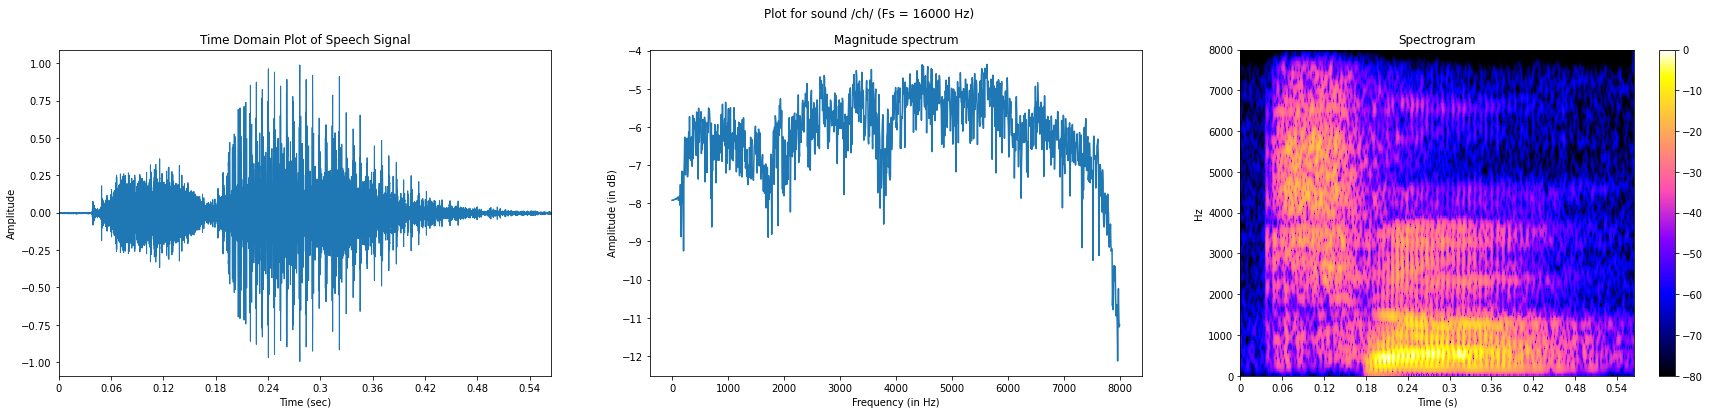

In [21]:
ch, fs = librosa.load("ch.wav", sr = 16000)
plots(ch ,'/ch/',fs,0.037,0.178)

**Observation**

1. /Ch/ is a stop consonant and hence in has closure,burst and frication. This can be observed in the spectrogram. 

#References and Tools

1. For theory concepts :- https://vlab.amrita.edu/index.php?sub=59&brch=164&sim=614&cnt=1
2. Wavesurfer:- https://sourceforge.net/projects/wavesurfer/